<a href="https://colab.research.google.com/github/xanasa14/ShoeClassificatorFITVSFIT_GENERATOR/blob/master/ModelFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras import utils
import warnings 



In [0]:
# Part-1 - Initialising the CNN and compiling the model
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
# Part 2 - Create train and test ImageDataGenerator via 'flow_from_directory' 

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2,
                                   horizontal_flip = True)
print(train_datagen)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/CatDogImages/Train',target_size = (64, 64),
                                                 batch_size = 32, class_mode = 'binary')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/CatDogImages/Test', target_size = (64, 64), 
                                            batch_size = 32, class_mode = 'binary')
# Part 3 - Fitting the CNN to the images. Train the Model on Training images. For validation, used Test Images
classifier.fit(training_set, steps_per_epoch = 800, epochs = 3,
                         validation_data = test_set, validation_steps = 200)
#classifier.fit_generator(training_set, steps_per_epoch = 800, epochs = 1,
#                         validation_data = test_set, validation_steps = 200)


#print(classifier)


Found 3306 images belonging to 2 classes.
Found 628 images belonging to 2 classes.
Epoch 1/3
800/800 [==============================] - 233s 292ms/step - loss: 0.4532 - acc: 0.7902 - val_loss: 0.5704 - val_acc: 0.7150
Epoch 2/3
800/800 [==============================] - 234s 292ms/step - loss: 0.3862 - acc: 0.8247 - val_loss: 0.4739 - val_acc: 0.7755
Epoch 3/3
800/800 [==============================] - 232s 290ms/step - loss: 0.3245 - acc: 0.8589 - val_loss: 0.4769 - val_acc: 0.7882


In [0]:
#First pic 
import skimage.io 
import skimage.segmentation
# Part 4 - Making new predictions for single image which is loaded from local folder

test_image = image.load_img('/content/drive/My Drive/CatDogImages/secondDog.jpg', target_size = (64, 64))
#test_image = skimage.io.imread("https://arteagac.github.io/blog/lime_image/img/cat-and-dog.jpg")
test_image = image.img_to_array(test_image)
#print("test image1:", test_image)
test_image = np.expand_dims(test_image, axis = 0)
#print("test image2:", test_image)

[[1.]]
AxesImage(10.8,27.8;410.4x247.099)
It is a : dog


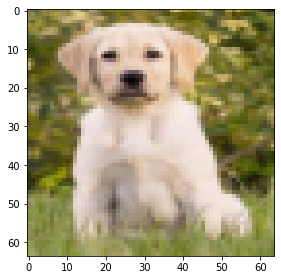

In [23]:
result = classifier.predict(test_image)
print(result)
#training_set.class_indices
Xi = skimage.io.imread("/content/drive/My Drive/CatDogImages/secondDog.jpg")
Xi = skimage.transform.resize(Xi, (64,64)) 
Xi = (Xi - 0.5)*2 #Inception pre-processing
print(skimage.io.imshow(Xi/2+0.5)) # Show image before inception preprocessin

if result[0][0] == 1:
    prediction = 'dog'
elif result[0][0] == 0:
    prediction = 'cat'
else:
    prediction = 'IDK'
    
print("It is a :", prediction)